In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 12})

In [2]:
def foo_k_r(T):
    return k_r0 * math.e**(-E_a/(R_u*T))

In [3]:
def foo_k(T, gas_name):
    if gas_name == 'H2':
        a0 = 0.3975
        a1 = 0.4814/10**4
        a2 = -1.073/10**7
        a3 = 4.6863/10**11
        a4 = -8.5361/10**15
        a5 = 5.6934/10**19
    elif gas_name == 'O2':
        a0 = 0.4697
        a1 = -2.9819/10**4
        a2 = 2.0320/10**7
        a3 = -7.1938/10**11
        a4 = 12.311/10**15
        a5 = -8.0736/10**19
    elif gas_name == 'H2O':
        a0 = 0.3834
        a1 = -1.8579/10**4
        a2 = 0.6266/10**7
        a3 = -1.0528/10**11
        a4 = 0.93554/10**15
        a5 = -0.38512/10**19
    else:
        print('Houston we have a problem')
    return 1 + a0 + a1*T + a2*T**2 + a3*T**3 + a4*T**4 + a5*T**5

In [24]:
def foo_alpha(r):
    if r != 0:
        a = 1 - math.e**(-r)
        return (1-a/r)/a
    else:
        return 0.5

In [25]:
# параметры установки
d = 45*10**(-3) # калибр
S = math.pi*d**2/4 # площадь
W_0 = 0.005 # объем каморы
l_d = 4.5 # длина ствола
m_elem = 0.52 # масса МЭ
p_f = 172 * 10**6 # давление форсирования
k_r0 = 9.87 * 10**8 # предэскп. множитель 

Q_t = 13.4 * 10**6 # энергия образования 1 кг продуктов реакций 
# E_ign = 0.5*10**6 # энергия воспламенителя
E_ign = 0*10**6 # энергия воспламенителя
E_a = 60*10**3 # энергия активации

v_p0 = 0 # начальная скорость
x_p0 = 0 # начальная координата
p_a = 10**5 # атмосфэрное давление

In [26]:
p_0 = 34.5 * 10**6 # начальное давление
T_0 = 300 # начальная температура
R_u = 8.31446262 # универсальная газовая постоянная
hi_O2_and_H2_0 = 1/8 # начальное соотношение мольных долей

In [27]:
mu_H2 = 2*10**(-3) # молярная масса водорода
mu_O2 = 16*10**(-3) # молярная масса кислорода
mu_H2O = 18*10**(-3) # молярная масса воды

In [28]:
# термодинамика
# R = foo_k_r * () # универсальная газовая постоянная
# m_g_0 = (2*mu_H2+mu_O2) * R_u * T_0/ (p_0 * W_0)
# print(m_g_0)
# rho_0 = m_g_0/W_0
# rho_0 = p_0/(R_u*T_0) # начальная плотность газа
# m_g_0 = rho_0*W_0 # начальная масса газа

# hi_O2_and_H2_0 = 8 # начальное соотношение мольных долей
# ratio_m_O2_and_m_H2_0 = hi_O2_and_H2_0*mu_O2/mu_H2 # начальное соотношение масс газа через мольные доли, скрин "мольные доли.png"

# m_H2_0 = m_g_0 / (ratio_m_O2_and_m_H2_0+1) # начальная масса водорода
# m_O2_0 = m_H2_0 * ratio_m_O2_and_m_H2_0 # начальная масса кислорода

# n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
# n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода

# С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
# С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода

# C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [29]:
# n_smesi = p_0 * W_0/(R_u * T_0)
# m_O2_0 = n_smesi * mu_O2 / (hi_O2_and_H2_0 * mu_O2/mu_H2+1)
# m_H2_0 = n_smesi * mu_H2 - m_O2_0 / mu_O2 * mu_H2
# n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
# n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода
# n_H2O_0 = 0 # начальное количества вещества воды

In [30]:
n_smesi = p_0 * W_0/(R_u * T_0)

n_H2_0 = n_smesi/(hi_O2_and_H2_0+1)# начальное количества вещества водорода
n_O2_0 =  n_H2_0 * hi_O2_and_H2_0  # начальное количества вещества кислорода
n_H2O_0 = 0 # начальное количества вещества воды

m_O2_0 = n_O2_0*mu_O2
m_H2_0 = n_H2_0*mu_H2

In [31]:
n_O2_0/n_H2_0

0.125

In [32]:
С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода
C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [13]:
help_value_T_0 = (n_H2_0/(foo_k(T_0,'H2')-1) + n_O2_0/(foo_k(T_0,'O2')-1) + n_H2O_0/(foo_k(T_0,'H2O')-1))**(-1)
k_smesi_T_0 = 1 + n_H2_0*help_value_T_0 + n_O2_0*help_value_T_0 + n_H2O_0*help_value_T_0 # показатель адиабаты смеси для формулы 4.5

In [40]:
tau = 0 # время от начала процесса

C_n_1 = np.array([С_H2_0, 
                  С_O2_0, 
                  C_H2O_0]) # начальный вектор C

C_n = C_n_1

P_n = np.array([0,
                0,
                foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(1/2)]) # начальный вектор Р

D_n = np.array([foo_k_r(T_0)*C_n_1[1]**(1/2), 
                1/2*foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(-1/2),
                0]) # начальный вектор D
W_n_1 = W_0 # начальный объем
v_p = v_p0 # начальная скорость
x_p = x_p0 # начальная координата
T = T_0 # начальная температура
p_m = p_0 # начальное давление

tau_arr = np.array([])
C_H2_arr = np.array([])
C_O2_arr = np.array([])
C_H2O_arr = np.array([])
m_H2_arr = np.array([])
m_O2_arr = np.array([])
m_H2O_arr = np.array([])
v_p_arr = np.array([])
p_m_arr = np.array([])
x_p_arr = np.array([])
M_p_arr = np.array([])
# rho_arr = np.array([])
T_arr = np.array([])

dt = 1e-10

schetchik = 0
falg_fors = 0
flag_dt = 0

while x_p <= l_d: # условие цикла, пока МЭ не покинул дульный срез
    schetchik+=1
    
    if C_n[1] > С_O2_0 * 0.5 and flag_dt == 0:
        dt = 1e-10
    elif C_n[1] <= С_O2_0 * 0.5 and flag_dt == 0:
        dt = 1e-11
        flag_dt = 1
    elif C_n[1] <= С_O2_0 * 0.15 and flag_dt == 1:
        dt = 1e-13
        flag_dt = 2
    elif C_n[1] <= С_O2_0 * 0.006 and flag_dt == 2:
        dt = 1e-15
        flag_dt = 3
    elif C_n[1] <= 1 and flag_dt == 3:
        dt = 1e-10
        flag_dt = 4
    elif flag_dt == 4:
        dt = 1e-10
    
    tau += dt # время от начала процесса

    C_n = C_n_1 # вектор С
    
    W_n = W_n_1
    
    #     dM_p = mu_H2O * (C_n_1[2] - C_n[2]) * W_n # масса продуктов реакции   
    M_p = mu_H2O * C_n[2] * W_n
    
    n_H2 = C_n[0] * W_n # количество вещества водорода
    n_O2 = C_n[1] * W_n # количество вещества кислорода
    n_H2O = C_n[2] * W_n  # количество вещества воды
    
    m_H2 = n_H2 * mu_H2 # масса водорода
    m_O2 = n_O2 * mu_O2 # масса кислорода
    m_H2O = n_H2O * mu_H2O # масса воды

    n_smesi = n_H2 + n_O2 + n_H2O # количество вещества смеси

    phi = (1+(m_H2 + m_O2 + m_H2O)/(3*m_elem)) # фиктивность, масса всего
    
    # расчет показателя адиабаты смеси 
    help_value = (n_H2/(foo_k(T,'H2')-1) + n_O2/(foo_k(T,'O2')-1) + n_H2O/(foo_k(T,'H2O')-1))**(-1)
    k_smesi = 1 + n_H2*help_value + n_O2*help_value + n_H2O*help_value # показатель адиабаты смеси для формулы 4.5
    
#     dp_m = (k_smesi-1)/W_n * ((p_0*W_0)/(k_smesi_T_0-1) + Q_t*dM_p - E_ign - phi/2*m_elem*v_p**2) * dt
#     p_m += dp_m
    p_m = (k_smesi-1)/W_n * ((p_0*W_0)/(k_smesi_T_0-1) + Q_t*M_p - E_ign - phi/2*m_elem*v_p**2) # среднебаллистическое давление

    T = p_m*W_n/(R_u*n_smesi)

    if p_m <= p_f and falg_fors == 0:
        dv_p = 0
    elif p_m <= p_f and falg_fors == 1:
        dv_p = (p_m - p_a)*S/(phi*m_elem) * dt
    elif  p_m > p_f:
        falg_fors = 1
        dv_p = (p_m - p_a)*S/(phi*m_elem) * dt # диф. скорости МЭ
    
    v_p += dv_p # скорость МЭ

    dx_p = v_p * dt # диф. координаты МЭ
    
    x_p += dx_p  # координата МЭ
    
    W_n_1 = W_0 + x_p*S  # Заснарядный объем на n+1 шаге
    
    W_n = W_0 + (x_p-dx_p)*S # Заснарядный объем на n шаге
           
    # вектор P и D
    P_n = np.array([0, 
                    0, 
                    foo_k_r(T)*C_n[0]*C_n[1]**(1/2)])

    D_n = np.array([foo_k_r(T)*C_n[1]**(1/2), 
                    1/2*foo_k_r(T)*C_n[0]*C_n[1]**(-1/2),
                    0])
    
#     if C_n[1] >= 5e-1 or C_n[0] >= 5e-1:
#         P_n = np.array([0, 
#                         0, 
#                         foo_k_r(T)*C_n[0]*C_n[1]**(1/2)])
        
#         D_n = np.array([foo_k_r(T)*C_n[1]**(1/2), 
#                         1/2*foo_k_r(T)*C_n[0]*C_n[1]**(-1/2),
#                         0])
#     else:
#         P_n = np.array([0, 0, 0])
#         D_n = np.array([0, 0, 0]) 
        
    foo_alpha_res = np.array([0,0,0]) # значение умножения алфа функции от произведения вектора D на dt, 
    for i in range(len(D_n)):
        foo_alpha_res[i] = foo_alpha(D_n[i]*dt)
        
    C_n_kr = W_n/W_n_1 * (C_n + (dt *(P_n-C_n*D_n))/(1+foo_alpha_res*D_n*dt)) # Предиктор вектора С
   
    if C_n_kr[1] >= 0 and C_n_kr[1] >= 0:
        D_n_kr = (np.array([foo_k_r(T)*C_n_kr[1]**(1/2), 
                            1/2*foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(-1/2),
                            0]) + D_n)/2 # Предиктор вектора D
    else:
        D_n_kr = np.array([0,0,0])
            
    foo_alpha_res = np.array([0,0,0]) # значение умножения алфа функции от произведения вектора D на dt, 
    for i in range(len(D_n_kr)):
        foo_alpha_res[i] = foo_alpha(D_n_kr[i]*dt)
     
    
    if C_n_kr[0] >= 0 and C_n_kr[1] >= 0:
        P_n_kr = foo_alpha_res*np.array([0, 
                                         0, 
                                         foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(1/2)]) + (1-foo_alpha_res)*P_n # Предиктор вектора P    
    else:
        P_n_kr = np.array([0,0,0])
        
    C_n_1 = W_n/W_n_1 * (C_n + (dt *(P_n_kr-C_n*D_n_kr))/(1+foo_alpha_res*D_n_kr*dt)) # Корректор вектора С
    
    if schetchik % 10_000 == 0:
        tau_arr = np.append(tau_arr, tau)
        x_p_arr = np.append(x_p_arr, x_p)
        C_H2_arr = np.append(C_H2_arr, C_n[0])
        C_O2_arr = np.append(C_O2_arr, C_n[1])
        C_H2O_arr = np.append(C_H2O_arr, C_n[2])
        m_H2_arr = np.append(m_H2_arr, m_H2)
        m_O2_arr = np.append(m_O2_arr, m_O2)
        m_H2O_arr = np.append(m_H2O_arr, m_H2O)
        M_p_arr = np.append(M_p_arr, M_p)
        v_p_arr = np.append(v_p_arr, v_p)
        T_arr = np.append(T_arr,T)
        p_m_arr = np.append(p_m_arr, p_m)
    if schetchik % 100_000 == 0:
        print(tau, x_p, p_m/10**6, C_n, T, dt, flag_dt, n_smesi)

1.0000000000009798e-05 0.0 34.516205451420944 [1.22943364e+04 1.53672791e+03 1.71034657e-01] 300.1427727141413 1e-10 0 69.15617654756396
2.0000000000031725e-05 0.0 34.53259723365403 [1.22941634e+04 1.53664140e+03 3.44042470e-01] 300.2871889012916 1e-10 0 69.15574402803172
3.0000000000053652e-05 0.0 34.54917933156917 [1.22939883e+04 1.53655389e+03 5.19065695e-01] 300.43328373381394 1e-10 0 69.15530646997126
4.000000000007558e-05 0.0 34.56595602569949 [1.22938113e+04 1.53646535e+03 6.96149750e-01] 300.58109499201305 1e-10 0 69.15486375983244
5.0000000000097506e-05 0.0 34.582931740347526 [1.22936321e+04 1.53637575e+03 8.75341584e-01] 300.73066172569787 1e-10 0 69.15441578024763
6.000000000011943e-05 0.0 34.600111050043104 [1.22934507e+04 1.53628508e+03 1.05668974e+00] 300.88202431122676 1e-10 0 69.15396240985979
6.999999999953388e-05 0.0 34.61749868636568 [1.22932672e+04 1.53619330e+03 1.24024443e+00] 301.0352245117966 1e-10 0 69.15350352313573
7.999999999887818e-05 0.0 34.63509954515625 

0.0006200000000004805 0.0 36.176051425611696 [12276.78340068  1527.95142472    17.72400097] 314.7760434517257 1e-10 0 69.11229413184269
0.0006300000000038906 0.0 36.22627385192464 [12276.25120615  1527.68532746    18.2561955 ] 315.21910850311804 1e-10 0 69.11096364551211
0.0006400000000073006 0.0 36.27815266890503 [12275.70139094  1527.41041985    18.80601071] 315.67680501855386 1e-10 0 69.10958910749196
0.0006500000000107107 0.0 36.33179559120258 [12275.13280651  1527.12612764    19.37459514] 316.1500851875619 1e-10 0 69.1081676464183
0.0006600000000141208 0.0 36.387321003028525 [12274.54419035  1526.83181956    19.9632113 ] 316.6399955688481 1e-10 0 69.10669610602395
0.0006700000000175308 0.0 36.44485940169123 [12273.93415055  1526.52679966    20.5732511 ] 317.1476898635065 1e-10 0 69.1051710065321
0.0006800000000209409 0.0 36.504555092297466 [12273.30114767  1526.21029822    21.20625398] 317.67444391148115 1e-10 0 69.10358849932791
0.0006900000000243509 0.0 36.566568187723334 [12272

0.0011973092254842898 0.014144901760306845 219.7193988147117 [9.22958019e+03 9.95343191e-01 3.03661988e+03] 2154.214444109241 1e-10 4 61.61194569190726
0.0012073092254876999 0.015413962844709245 219.6129374422649 [9.22587265e+03 9.94943361e-01 3.03540006e+03] 2154.0359342027996 1e-10 4 61.61194569190629
0.00121730922549111 0.016737366791796583 219.5020174442658 [9.22200953e+03 9.94526751e-01 3.03412906e+03] 2153.8498698205576 1e-10 4 61.611945691904666
0.00122730922549452 0.018115086142341426 219.38665357463103 [9.21799129e+03 9.94093413e-01 3.03280702e+03] 2153.65626599419 1e-10 4 61.61194569190454
0.00123730922549793 0.01954709233699406 219.26686115197182 [9.21381843e+03 9.93643400e-01 3.03143411e+03] 2153.4551383422777 1e-10 4 61.61194569190572
0.00124730922550134 0.021033355720077012 219.14265605446573 [9.20949146e+03 9.93176768e-01 3.03001049e+03] 2153.2465030663316 1e-10 4 61.61194569190469
0.0012573092255047501 0.02257384554351643 219.0140547145994 [9.20501090e+03 9.92693572e-01

0.001737309225668433 0.15942512400522152 208.11474514655123 [8.82365125e+03 9.51566703e-01 2.90306539e+03] 2134.307526286945 1e-10 4 61.61194569190558
0.001747309225671843 0.1635637152332267 207.8005699781476 [8.81260999e+03 9.50375984e-01 2.89943271e+03] 2133.755545904606 1e-10 4 61.61194569190452
0.001757309225675253 0.16775372506545283 207.4833714966363 [8.80145966e+03 9.49173502e-01 2.89576414e+03] 2133.197530996223 1e-10 4 61.611945691905646
0.0017673092256786632 0.17199507497647898 207.16318457387382 [8.79020141e+03 9.47959381e-01 2.89206007e+03] 2132.633520145451 1e-10 4 61.61194569190481
0.0017773092256820732 0.17628768570106043 206.8400442217053 [8.77883638e+03 9.46733746e-01 2.88832087e+03] 2132.063552182002 1e-10 4 61.61194569190384
0.0017873092256854833 0.18063147724279727 206.5139855833318 [8.76736572e+03 9.45496718e-01 2.88454691e+03] 2131.4876661742987 1e-10 4 61.61194569190377
0.0017973092256888933 0.18502636888283294 206.18504392474458 [8.75579059e+03 9.44248425e-01 2.

0.002287309225855986 0.4611225185165647 187.2800376849306 [8.08519671e+03 8.71929744e-01 2.66010680e+03] 2096.058389271867 1e-10 4 61.61194569189203
0.0022973092258593963 0.4679561245750222 186.85233961363213 [8.06989915e+03 8.70280014e-01 2.65507376e+03] 2095.235825653818 1e-10 4 61.611945691891876
0.0023073092258628063 0.47483596330151834 186.42354298804287 [8.05455647e+03 8.68625418e-01 2.65002587e+03] 2094.4095308385486 1e-10 4 61.61194569189184
0.0023173092258662164 0.4817619285431705 185.99367964635945 [8.03916974e+03 8.66966070e-01 2.64496349e+03] 2093.579546865743 1e-10 4 61.61194569189088
0.0023273092258696264 0.48873391388301307 185.56278122071785 [8.02374003e+03 8.65302088e-01 2.63988697e+03] 2092.745915677653 1e-10 4 61.611945691890554
0.0023373092258730365 0.49575181264782925 185.13087913387434 [8.00826840e+03 8.63633586e-01 2.63479666e+03] 2091.9086791145573 1e-10 4 61.61194569189099
0.0023473092258764466 0.5028155179159233 184.69800459604957 [7.99275593e+03 8.61960678e-0

0.0028373092260435395 0.9027769870245234 162.88183156222857 [7.20275657e+03 7.76764984e-01 2.36977558e+03] 2046.3333673103732 1e-10 4 61.6119456918889
0.0028473092260469495 0.9119912974108645 162.43481843989824 [7.18639271e+03 7.75000260e-01 2.36439172e+03] 2045.36424748986 1e-10 4 61.61194569188817
0.0028573092260503596 0.9212457956554485 161.98809952502725 [7.17003214e+03 7.73235893e-01 2.35900894e+03] 2044.3934762174877 1e-10 4 61.61194569188751
0.0028673092260537696 0.930540371168262 161.54169296384117 [7.15367554e+03 7.71471951e-01 2.35362746e+03] 2043.4210857173262 1e-10 4 61.61194569188741
0.0028773092260571797 0.9398749134365562 161.09561665002974 [7.13732353e+03 7.69708507e-01 2.34824749e+03] 2042.4471079868915 1e-10 4 61.61194569188677
0.0028873092260605897 0.9492493120293831 160.6498882257949 [7.12097677e+03 7.67945627e-01 2.34286925e+03] 2041.4715747967248 1e-10 4 61.61194569188768
0.002897309226064 0.9586634566018992 160.20452508288554 [7.10463589e+03 7.66183382e-01 2.3374

0.0033873092262310927 1.466381738419406 139.12748886293468 [6.32220417e+03 6.81803803e-01 2.08006545e+03] 1991.3468369159605 1e-10 4 61.61194569189
0.0033973092262345028 1.477645486899339 138.71744059511306 [6.30679520e+03 6.80142058e-01 2.07499575e+03] 1990.3287550930183 1e-10 4 61.6119456918904
0.003407309226237913 1.4889435517412546 138.30834673967237 [6.29141456e+03 6.78483368e-01 2.06993538e+03] 1989.3104571688457 1e-10 4 61.61194569189032
0.003417309226241323 1.5002758316694265 137.90021379150213 [6.27606252e+03 6.76827761e-01 2.06488441e+03] 1988.291963106611 1e-10 4 61.61194569188801
0.003427309226244733 1.511642225645983 137.49304808328748 [6.26073934e+03 6.75175268e-01 2.05984293e+03] 1987.2732926653825 1e-10 4 61.61194569188819
0.003437309226248143 1.5230426328724738 137.08685578732425 [6.24544528e+03 6.73525915e-01 2.05481104e+03] 1986.2544654012142 1e-10 4 61.61194569188748
0.003447309226251553 1.5344769527914421 136.68164291738572 [6.23018060e+03 6.71879730e-01 2.04978882

0.003937309226283948 2.134276256526256 118.11342255254185 [5.52218457e+03 5.95527500e-01 1.81685137e+03] 1935.4894771630836 1e-10 4 61.61194569188731
0.00394730922624399 2.147283660644792 117.76185999405395 [5.50860904e+03 5.94063478e-01 1.81238490e+03] 1934.4841893142575 1e-10 4 61.61194569188639
0.003957309226204032 2.1603201933335785 117.41141392894212 [5.49506992e+03 5.92603382e-01 1.80793039e+03] 1933.4795105347018 1e-10 4 61.61194569188694
0.003967309226164074 2.173385767835669 117.0620844492789 [5.48156724e+03 5.91147216e-01 1.80348789e+03] 1932.4754513034934 1e-10 4 61.611945691887406
0.003977309226124116 2.1864802976705433 116.7138715725315 [5.46810106e+03 5.89694986e-01 1.79905738e+03] 1931.4720219611565 1e-10 4 61.611945691887826
0.003987309226084158 2.199603696634153 116.36677524282625 [5.45467141e+03 5.88246696e-01 1.79463890e+03] 1930.4692327111363 1e-10 4 61.611945691886824
0.0039973092260442 2.2127558787986623 116.0207953321868 [5.44127832e+03 5.86802349e-01 1.79023245e

0.004487309224086257 2.8907571634847575 100.41643512602757 [4.82993390e+03 5.20873292e-01 1.58909430e+03] 1881.3348100423145 1e-10 4 61.611945691892195
0.0044973092240462986 2.905245003395447 100.124842327186 [4.81836591e+03 5.19625769e-01 1.58528832e+03] 1880.375338623203 1e-10 4 61.61194569189206
0.0045073092240063405 2.9197576056281838 99.83428886563595 [4.80683357e+03 5.18382089e-01 1.58149407e+03] 1879.4168764912333 1e-10 4 61.61194569189159
0.0045173092239663825 2.9342948982530683 99.54477226378471 [4.79533682e+03 5.17142249e-01 1.57771153e+03] 1878.459428138344 1e-10 4 61.61194569189126
0.0045273092239264245 2.948856809596873 99.25629002027121 [4.78387560e+03 5.15906240e-01 1.57394068e+03] 1877.5029979750313 1e-10 4 61.611945691891705
0.0045373092238864664 2.9634432682424188 98.96883961060513 [4.77244986e+03 5.14674056e-01 1.57018151e+03] 1876.5475903315714 1e-10 4 61.61194569189248
0.004547309223846508 2.9780542030279977 98.68241848776006 [4.76105953e+03 5.13445692e-01 1.566433

0.005037309221888565 3.72255857782256 85.85105949739322 [4.24482826e+03 4.57773899e-01 1.39658897e+03] 1830.1555944201186 1e-10 4 61.61194569188885
0.005047309221848607 3.738308036547414 85.61251049276497 [4.23511413e+03 4.56726300e-01 1.39339293e+03] 1829.2564421186023 1e-10 4 61.61194569188852
0.005057309221808649 3.7540786648963405 85.37484277816075 [4.22543138e+03 4.55682086e-01 1.39020721e+03] 1828.3584457863906 1e-10 4 61.61194569188805
0.005067309221768691 3.7698704040319377 85.13805328308037 [4.21577994e+03 4.54641248e-01 1.38703179e+03] 1827.4616065527691 1e-10 4 61.61194569188882
0.005077309221728733 3.7856831953341286 84.90213893620088 [4.20615971e+03 4.53603776e-01 1.38386665e+03] 1826.5659255036435 1e-10 4 61.61194569188903
0.005087309221688775 3.8015169803995463 84.6670966656301 [4.19657060e+03 4.52569660e-01 1.38071174e+03] 1825.67140368207 1e-10 4 61.61194569188933
0.005097309221648817 3.8173717010407384 84.43292339914852 [4.18701251e+03 4.51538891e-01 1.37756704e+03] 1

In [41]:
len(tau_arr)

5519

In [42]:
v_p_arr[-1], max(p_m_arr/10**6)

(1669.1676605673504, 220.91240742827205)

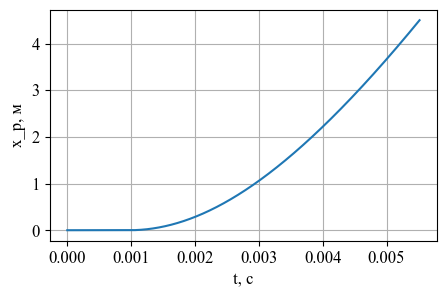

In [43]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, x_p_arr)
plt.xlabel('t, с')
plt.ylabel('x_p, м')
plt.grid()

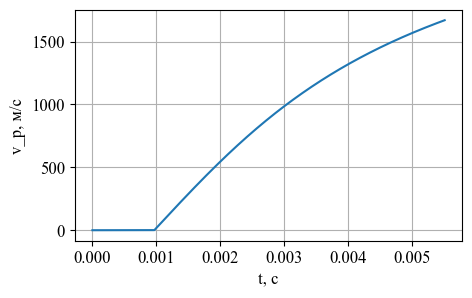

In [44]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, v_p_arr)
plt.xlabel('t, с')
plt.ylabel('v_p, м/с')
plt.grid()

In [45]:
m_H2_arr, m_O2_arr, m_H2O_arr

(array([0.1229449 , 0.12294473, 0.12294456, ..., 0.09271107, 0.09271107,
        0.09271107]),
 array([1.22944393e-01, 1.22943712e-01, 1.22943030e-01, ...,
        7.99857227e-05, 7.99857227e-05, 7.99857227e-05]),
 array([1.53129989e-06, 3.06449252e-06, 4.59942863e-06, ...,
        2.74525427e-01, 2.74525427e-01, 2.74525427e-01]))

In [46]:
# p_m зависит от v_p, v_p зависит от dv_p, что зависит от dt

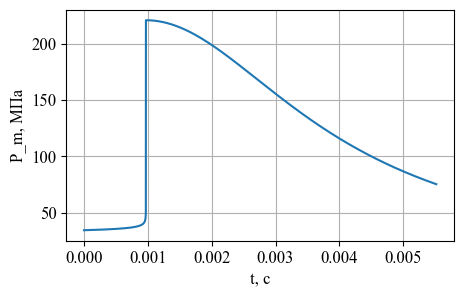

In [47]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, p_m_arr/10**6)
plt.xlabel('t, с')
plt.ylabel('P_m, МПа')
plt.grid()

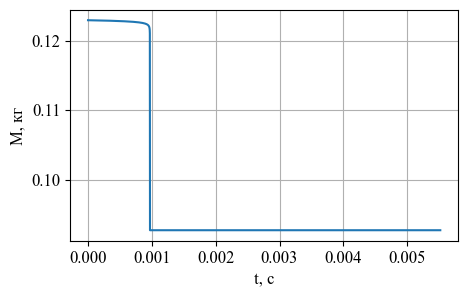

In [48]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, m_H2_arr)
plt.xlabel('t, с')
plt.ylabel('M, кг')
plt.grid()

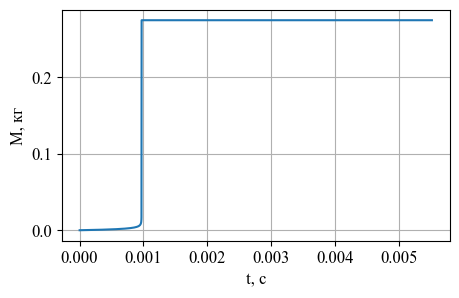

In [49]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, M_p_arr)
plt.xlabel('t, с')
plt.ylabel('M, кг')
plt.grid()

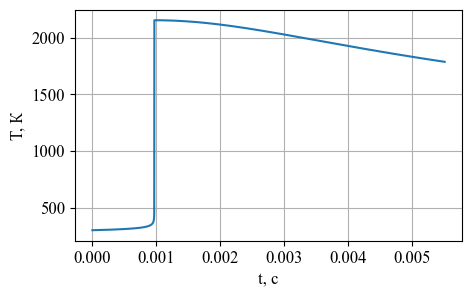

In [50]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, T_arr)
plt.xlabel('t, с')
plt.ylabel('T, К')
plt.grid()